# Introduction

In this notebook, we will perform text detection in images using OCR. We will start with image preprocessing and then conduct OCR using Tesseract, EasyOCR, and KerasOCR. By the end of this notebook, you will understand how to enhance image quality for OCR and extract text effectively from images.



# Install and Import Libraries

In [74]:
# !apt-get update
# !apt-get install -y tesseract-ocr

In [75]:
# !pip install pytesseract
# !pip install easyocr
# !pip install keras-ocr

In [76]:
# Warning! Don't run this code unless you had an error when creating a pipeline for OCR using KerasOCR in the next code cell
# !pip install tensorflow==2.9.1 keras==2.9.0
# pip install keras == 2.9.0
# After runnig this code you will have to restart the session and import libraries again

In [77]:
# pip install tesseract

In [78]:
import os
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [79]:
# Grayscale conversion
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 5)

# Sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

# Binarization
def binarize_image(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Helper display function
def display_image(image, title, is_rgb=False):
    if is_rgb:
        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [80]:
# image = cv2.imread('/content/Dataset/1.jpg')

# display_image(binarize_image(get_grayscale(image)),'Original')

# display_image(image,'Original')

In [81]:
image_path = []
folder_path = '/content/Dataset1'

images_paths = [
        os.path.join(folder_path, file)
        for file in os.listdir(folder_path)
        if os.path.splitext(file)[1].lower() in '.jpg'
    ]

print(len(images_paths))

35


## Pytesseract

In [82]:
# tesseract_text_extraction = []

# for image_path in images_paths:
#   image = cv2.imread(image_path)

#   gray_image = get_grayscale(image)

#   extracted_text = pytesseract.image_to_string(gray_image)
#   tesseract_text_extraction.append(extracted_text)



# boxes = pytesseract.image_to_boxes(gray_image)
# boxes_image = image.copy()

# for box in boxes.splitlines():
#     box = box.split(' ')
#     x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
#     # Draw the rectangle
#     cv2.rectangle(boxes_image, (x, boxes_image.shape[0] - y), (w, boxes_image.shape[0] - h), (0, 255, 0), 2)

# display_image(boxes_image, "Image with Bounding Boxes", is_rgb=True)

In [83]:
# print(tesseract_text_extraction)

## EasyOCR

In [84]:
easyocr_text_extraction = []

reader = easyocr.Reader(['en'])

for image_path in images_paths:
  image = cv2.imread(image_path)

  image = get_grayscale(image)

  image = cv2.bilateralFilter(image, 11, 17, 17)

  image = cv2.GaussianBlur(image, (3, 3), 0)

  # image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  result = reader.readtext(image)

  easyocr_text_extraction.append(result)

In [87]:
prediction = []

for result in easyocr_text_extraction:
  for detection in result:
    print(detection[1])

EFQ DZI
T
Naij NrU
02Fad
DJOEd
A65 JKV
FJia zhy
LJcV
GXis OGJ
064OGX
EGINBG
GiB <
cEGIUYL
LUp
HOSZ
pBG65 USJ
Wg65 ZFX
Kho6 KsU
HNIA
KBY
BP6JLYH
LPI
WSISU
Coxs
LgaHI
QD
LLGIPZS
(S4OL
duos YRO
Apos JEQ 
LHISZZC
NSKqJ
DNOCX
0fosWKJ
NEIVSU


## KerasOCR

In [ ]:
# pipeline = keras_ocr.pipeline.Pipeline()


# tesseract_text_extraction = []
# images = []

# for image_path in images_paths:
#   image = keras_ocr.tools.read(image_path)
#   images.append(image)


# prediction_groups = pipeline.recognize(images)

# for predictions in prediction_groups:
#     for prediction in predictions:
#         print(prediction[0])

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
2/2 [==============================] - 18s 7s/step
rozfkd
hggs
zfx
duds
xro
cu
lloipzs
avoeh
gie
nais
nru
k6a
dmy
nasa
kgj
hna
eyo9
vls
kho6
ksu
lup
msnsu
efid
dzt
fjl
zhy
kby
hrszope
leial
lais
vcv
afds
jed
bps3
lyh
bgssuss
0f05
vka
afgs
jky
lnis
zzc
ina
nlea
ogx
gade
epo
dadz
clx
cxis
ogu
eyginbg
cesiiyl
khoge
zzk


In [ ]:
# easyocr_text_extraction = []

# reader = easyocr.Reader(['en'])

# for image_path in images_paths:
#   image = cv2.imread(image_path)

#   image = cv2.GaussianBlur(image, (5, 5), 0)
#   image = cv2.Canny(image, 30, 200)


#   # image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#   result = reader.readtext(image)

#   easyocr_text_extraction.append(result)

In [ ]:
# for result in easyocr_text_extraction:
#   for detection in result:
#       print(detection[1])

{@GGs 2FX
0os
QID
LLGI PzS
0 3 NQu
HMQ
7709 VOS
1hd6 KSU
0S
E;C
Zhhy
Kp
LPia
(BPe
VH
g15
05
Orss
Lius ZZC
WLE4 @gx
6}
07 CLX
Gxis 0GJ
Ceg


UA 7768


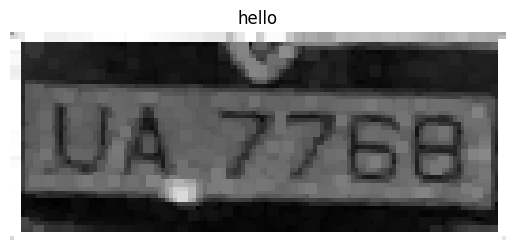

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

image = cv2.imread('/content/Dataset/32.jpg')

image = get_grayscale(image)

# image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# image = remove_noise(image)

# image = cv2.bilateralFilter(image, 11, 17, 17)

image = sharpen_image(image)

# image = cv2.Canny(image, 30, 200)


image = cv2.dilate(image, kernel, iterations=1)

# image = cv2.erode(image, kernel, iterations=2)

# image = cv2.GaussianBlur(image, (3, 3), 0)

# image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


result = reader.readtext(image)

for detection in result:
      print(detection[1])

display_image(image,'hello')